In [44]:
from sklearn.neighbors import KNeighborsClassifier
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

# x train, y Train
x_train = train_set
x_train.drop("Class", axis=1)
y_train = train_set["Class"]

# x test, y test
x_test = test_set
x_test.drop("Class", axis=1)
y_test = x_test["Class"]

In [42]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test) #These are the predicted output values

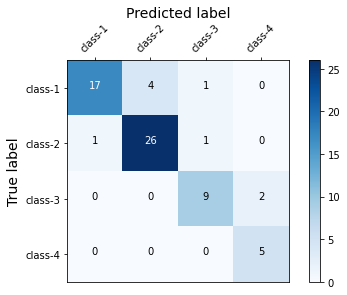

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, ypred)
#print(matrix)

class_names = ['CardiacLim','Healthy','MuscleSkeletalLim','class-4']
   
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()


In [35]:
result1 = classification_report(y_test, ypred)
print(result1)


              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.87      0.93      0.90        28
           2       0.82      0.82      0.82        11
           3       0.71      1.00      0.83         5

    accuracy                           0.86        66
   macro avg       0.84      0.88      0.85        66
weighted avg       0.87      0.86      0.86        66



In [36]:
result2 = accuracy_score(y_test,ypred)
print(result2)

0.8636363636363636
